In [2]:
import mrcfile

In [3]:
file = '../../data/InAs-NW-004-512-normalized__.mrc'

with mrcfile.open(file, mode='r+', permissive=True) as mrc:
    mrc.header.map = mrcfile.constants.MAP_ID

with mrcfile.open(file, mode='r+', permissive=True) as mrc:
    mrc.update_header_from_data()

with mrcfile.open(file) as mrc:
    data = mrc.data

In [4]:
print(data.shape)

(140, 512, 512)


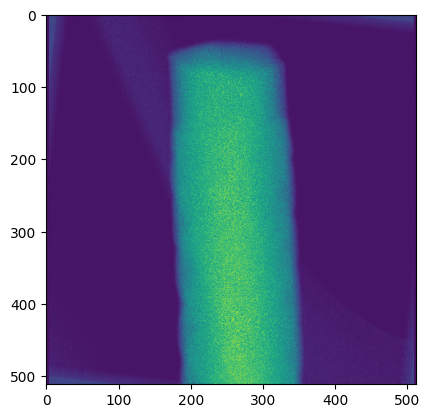

In [5]:
import matplotlib.pyplot as plt
single_img = data[0]
plt.imshow(single_img)

# Okay - I got this
* We work with a single nanowire that we're trying to reconstruct 
* .mcr file has got projections of nanowires from 140 angles (therefore the file is 140x512x512)
* .m file is a matlob file that uses that data to produce 512 slices (one slice per pixel). which there are 140 per slice (so 512 x 140 files)
* What exactly is a single projection?

In [6]:
filename = '../../data/created_data/Joost_Slice1/projection_1'
filename2 = '../../data/created_data/Joost_Slice1/projection_100'
f = open(filename)

# test_file = zip_file.read("exercises/test.py").decode("utf-8")
f

<_io.TextIOWrapper name='../../data/created_data/Joost_Slice1/projection_1' mode='r' encoding='UTF-8'>

In [7]:
import numpy as np
def read_matrix(file_name):
    return np.fromfile(file_name, dtype='uint8')


a = read_matrix(filename)
b = read_matrix(filename2)
a.shape

(4096,)

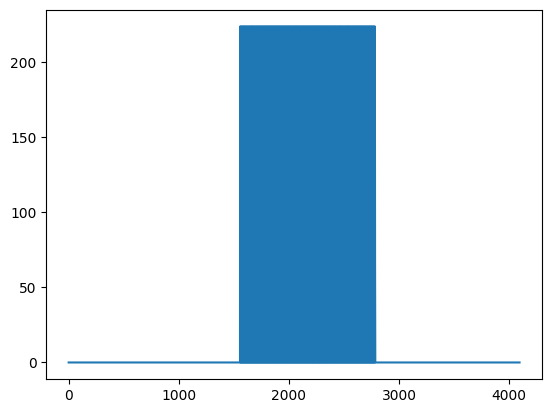

In [8]:
plt.plot(a)

# Cool, we've explored the data - now how do we put it all together?

In [9]:
import numpy as np

def read_txt(file_path):
    output_array = []
    with open(file_path) as f:
        lines = f.readlines()
    for line in lines:
        nr = line.replace("\n", "")
        nr = int(nr)
        output_array.append(nr)
    return np.array(output_array)

def read_matrix(file_name):
    # return np.fromfile(file_name, dtype='double')
    return np.fromfile(file_name, dtype='double')
    # return np.fromfile(file_name, dtype='float')
    
def get_data(read_from = "txt"):
    ''' 
    Reads the .mcr file and output of .m file to get nanowire's data(remember, single nanowire!)
    read_from: (str)
        either "txt" or "binary"
    '''
    if read_from not in ["txt", "binary"]: raise Exception

    DIRECTORY = "/Users/szczekulskij/side_projects/tomography-reconstruction-CNN/data/created_data/"
    NR_SLICES = 512
    NR_PROJECTIONS = 140
    output_sinograms = []

    for i in range(1,NR_SLICES + 1):
        folder_w_projections = DIRECTORY + "Joost_Slice" + str(i)
        sinogram = []
        for j in range(1, NR_PROJECTIONS + 1):
            if read_from == "binary":
                projection_file = folder_w_projections + "/" + "projection_" + str(j)
                projection = read_matrix(projection_file)
            elif read_from == "txt":
                projection_file = folder_w_projections + "/" + "projection_" + str(j) + ".txt"
                projection = read_txt(projection_file)
            sinogram.append(projection)
        sinogram = np.array(sinogram).T
        output_sinograms.append(sinogram)
    return output_sinograms

sinograms = get_data()

In [27]:
sinogram = sinograms[0]
sinogram.shape

(512, 140)

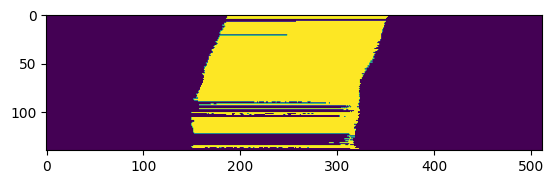

In [20]:
plt.imshow(sinogram.T)

In [22]:
print(sinogram[200])

[255 255 255 255 255   0   0   0 255 255 255 255 255 255 255 255 255 255
 255 255 255   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
   0   0 255 255   0   0   0 255   0   0   0 255   0 255   0   0 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0
   0   0   0   0   0   0   0   0   0 255 255   0   0   0]


In [26]:
sinogram.shape

(512, 140)